In [1]:
# # hw main ideas
# # 1. supervised learning is using the existing data about the input and output to generate the inference about output prediction
# #    unsupervised learning is using predictor to predict non existing output.
# #    the difference is that supervised learning has supervisor but unsupervised learning does not.

# 2. from lecture 
# we know that regression model is about quantitative values, 
# the classification model is about qualitative and categorical values

# 3. from lecture 
# we knw that the training MSE and test MSE can be used to check regression ML
# and training error rate and test error rate can check classification ML

# 4.from lecture
# PREDICTIVE:
# What combo of features fits best?
# Aim is to predict Y with minimum
# reducible error Not focused onhypothesis tests
# DESCRIPTIVE:
# Choose model to best visually emphasize a trendin data
# i.e., using a line on a scatterplot
# INFERENTIAL:
# What features are significant?
# Aim is to test theories
# (Possibly) causal claims
# State relationship between outcome & predictor(s)

# 5.  a. Mechanistic is Assume a parametric form with a function f; empirical is there is no assumptions of f
#     they differs on the question of whether they have the fucniton f
#     they can use more parameters to increase more flexibility and they might be both have overfitting problem
#     b. I think that mechanistic models can be easier to comprehend because it requires less datasets than the non-parametric one
#     also it has a interpreable function f that takes in the parameters and generates results
#     c.we can use bias-variance tradeoff to choose whether we use the the simple model or flexible model to estimate on the basis to 
#     achieve better on low variance and low bias

# 6.  the first can be represented by the numerical data because the given is the data of the person's profile that we have numerical input
#     the second can be the categorical side because the personal contact is not measured numerically.


In [2]:
import statsmodels.api as sm
import pandas as pd
mpg_raw = sm.datasets.get_rdataset("mpg", "ggplot2")
mpg = mpg_raw.data

In [3]:
type(mpg)

pandas.core.frame.DataFrame

In [4]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


array([[<AxesSubplot: title={'center': 'hwy'}>]], dtype=object)

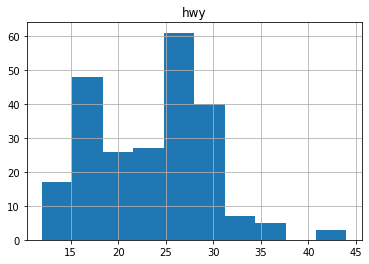

In [5]:
#1 we have tha the data is skewed to the right and the mean is around 25
mpg.hist(column="hwy")

<AxesSubplot: xlabel='hwy', ylabel='cty'>

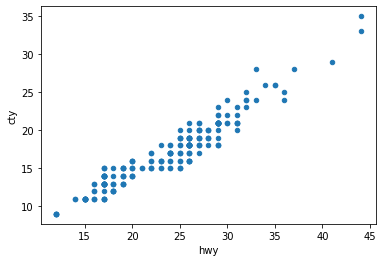

In [6]:
#2 we can see from the graph that these two varible follows the straight line this means that they might have linear ralations
mpg.plot.scatter(x = "hwy", y = "cty")

In [7]:
type(mpg.manufacturer.value_counts())

pandas.core.series.Series

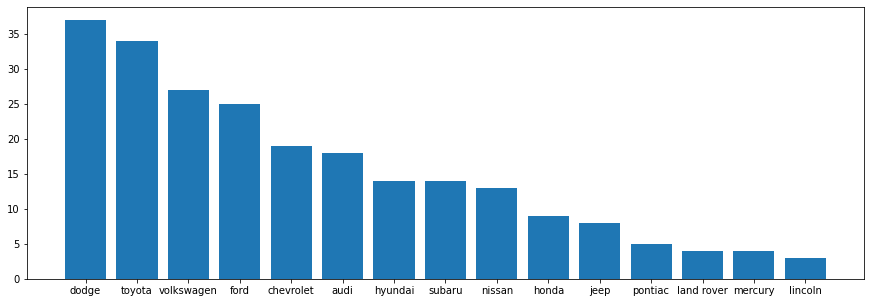

In [8]:
#3 by the plot we have dodge produce the most and lincoln preduce the least
df_manu = mpg.manufacturer.value_counts().reset_index() #use the counted categorical data and turn into a df
df_manu.columns = ["manu", "n"]
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))#change the figure size larger before plotting
plt.bar(df_manu.manu, df_manu.n)
plt.show()

<AxesSubplot: title={'center': 'hwy'}, xlabel='cyl'>

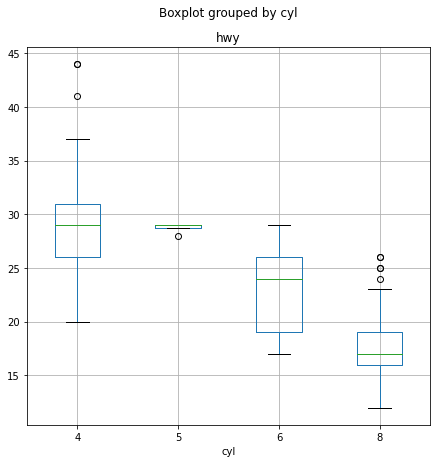

In [9]:
#4
#we can see from the plot as cyl increases the hwy decreases
mpg.boxplot(column=["hwy"], by='cyl', figsize=(7, 7))

In [10]:
#5
import numpy as np
corrM = mpg.corr(numeric_only = True)
print(corrM)
np.tril(corrM.values)
#we can see that sty and displ, hwy and displ, cty and year, cty and cyl, hwy and cyl are negatively correlated others are postive
#the make sense because the number of cylinders are related to mile per gallon and also the cwy and hwy
#the year and engine displacement are not so closely correlated suprises me

          displ      year       cyl       cty       hwy
displ  1.000000  0.147843  0.930227 -0.798524 -0.766020
year   0.147843  1.000000  0.122245 -0.037232  0.002158
cyl    0.930227  0.122245  1.000000 -0.805771 -0.761912
cty   -0.798524 -0.037232 -0.805771  1.000000  0.955916
hwy   -0.766020  0.002158 -0.761912  0.955916  1.000000


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.14784282,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.9302271 ,  0.12224535,  1.        ,  0.        ,  0.        ],
       [-0.79852397, -0.03723229, -0.80577141,  1.        ,  0.        ],
       [-0.76602002,  0.00215764, -0.76191235,  0.95591591,  1.        ]])

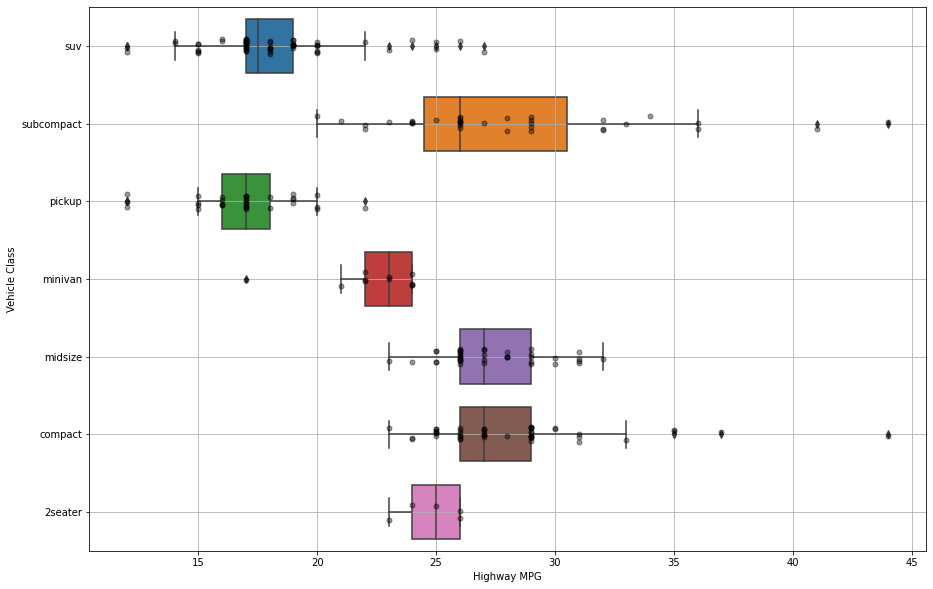

In [11]:
#6
#since I am using python this can be managed to have it own setting in seaborn 
#but its default have colors in the box plot so I did not change it
import seaborn as sns
plt.figure(figsize=(15,10))
box = sns.boxplot(data=mpg, x='hwy', y='class', width=0.7, color=None,
                 order=["suv", "subcompact", "pickup","minivan", "midsize", "compact", "2seater"])
box = sns.stripplot(data=mpg, x='hwy', y='class', 
                    alpha = 0.4, 
                    size=5,
                    linewidth=1,
                    color='k',
                   order=["suv", "subcompact", "pickup","minivan", "midsize", "compact", "2seater"])
plt.grid()
plt.xlabel('Highway MPG')
plt.ylabel('Vehicle Class')
plt.show()

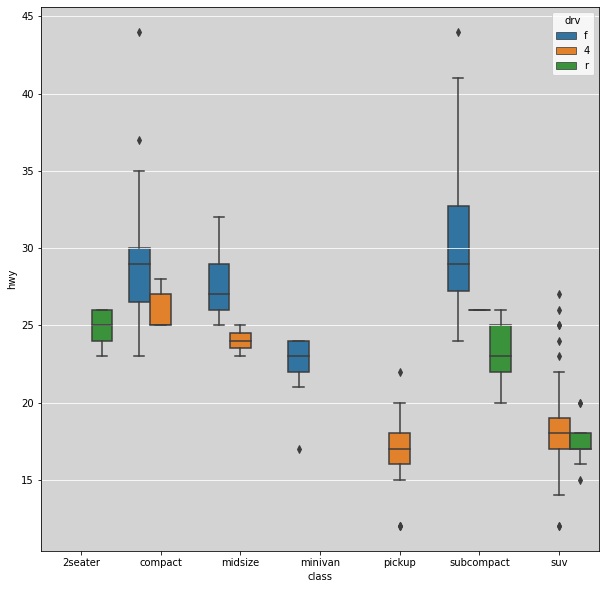

In [12]:
#7
plt.figure(figsize=(10,10))
plt.grid(color='white', which='both')
box = sns.boxplot(data=mpg, x='class', y='hwy',hue='drv', width=0.8,
                 order=["2seater", "compact", "midsize","minivan","pickup" ,"subcompact" , "suv"])
box.set_facecolor('lightgray')
plt.show()

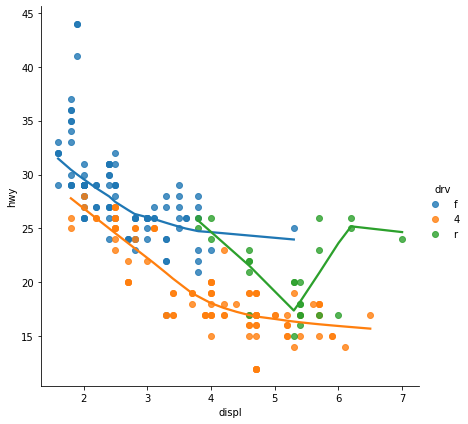

In [13]:
#8

regplot = sns.lmplot(x="displ", y="hwy", hue="drv", data=mpg,height=6, ci=None, lowess=True)
